# Ordinary Least Square and Decision Trees

### 1. OLS avec statsmodels

statsmodels.api.OLS

Avec ou sans *intercept*

model = OLS.fit(y, X)

model.predict(X)

model.summary()

In [1]:
# import des modules usuels
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt

# commande magique pour l'affichage des graphiques
%matplotlib inline

# options d'affichage
pnd.set_option("display.max_rows", 16)
plt.style.use('seaborn-darkgrid')

# no warnings
import warnings
warnings.filterwarnings('ignore')

In [62]:
pnd.get_option("display.max_columns")

20

In [2]:
# import statsmodels et datasets
import statsmodels.api as sm
from sklearn.datasets import load_boston
data = load_boston()
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
df = pnd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data.data.shape

(506, 13)

In [9]:
prix = pnd.DataFrame(data.target, columns=["MEDV"])
prix.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
data.target.shape

(506,)

### 1.1 Sans constante

X_test = 0 => y_pred = 0

In [11]:
X1 = df
y = prix["MEDV"]

model = sm.OLS(y, X1).fit()
y_pred1 = model.predict(X1)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Wed, 06 Dec 2017   Prob (F-statistic):               0.00
Time:                        16:25:34   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008      -0.159      -0.024
ZN             0.0487      0.014      3.379      0.001       0.020       0.077
INDUS         -0.0038      0.064     -0.059      0.953      -0.130       0.123
CHAS           2.8564      0.904      3.160      0.002       1.080       4.633
NOX           -2.8808      3.359     -0.858      0.392      -9.481       3.720
RM             5.9252      0.309     19.168      0.000       5.318       6.533
AGE           -0.0072      0.014     -0.523      0.601      -0.034       0.020
DIS           -0.9680      0.196     -4.947      0.000      -1.352      -0.584
RAD            0.1704      0.067      2.554      0.011       0.039       0.302
TAX           -0.0094      0.004     -2.393      0.017      -0.017      -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000      -0.608      -0.177
B              0.0150      0.003      5.561      0.000       0.010       0.020
LSTAT         -0.4170      0.051     -8.214      0.000      -0.517      -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

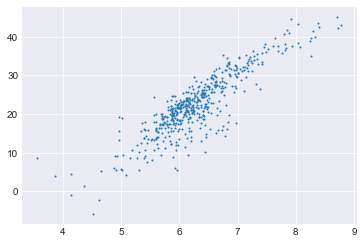

In [12]:
plt.scatter(X1['RM'], y_pred1, s=1);

In [18]:
df['RM'].corr(prix['MEDV'])

0.69535994707153903

### 1.2 Avec constante

In [19]:
X2 = sm.add_constant(df)
y = prix["MEDV"]

model = sm.OLS(y, X2).fit()
y_pred2 = model.predict(X2)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 06 Dec 2017   Prob (F-statistic):          6.95e-135
Time:                        16:29:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
X2

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,1.0,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,1.0,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,1.0,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1.0,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92


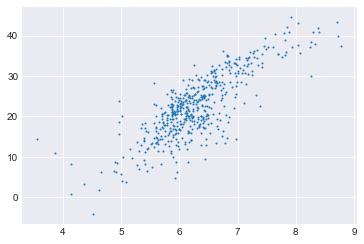

In [21]:
plt.scatter(X1['RM'], y_pred2, s=1);

### 1.3 Formules à la R

In [24]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
import statsmodels.formula.api as smf
df2 = df.copy()
df2['MEDV'] = prix
est = smf.ols(formula='MEDV ~ RM', data=df2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           2.49e-74
Time:                        16:34:01   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. OLS avec scikit-learn

sklearn.linear_model.LinearRegression

lm = LinearRegression()

lm.fit(X, y)

lm.predict(X)

### 2.1 Apprentissage sur toute la base

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()
lm.fit(df, prix)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
mean_squared_error(prix, lm.predict(df))

21.897779217687496

In [40]:
r2_score(prix, lm.predict(df))

0.7406077428649428

In [27]:
LinearRegression?

In [28]:
lm.intercept_[0]

36.491103280363134

In [29]:
pnd.Series(data=lm.coef_[0], index=df.columns)

CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

In [37]:
lm.singular_

array([  3.94958310e+03,   1.77662274e+03,   6.42864253e+02,
         3.66980826e+02,   1.59116390e+02,   1.18692322e+02,
         9.01718207e+01,   6.93889529e+01,   4.06572735e+01,
         2.44223087e+01,   1.13502686e+01,   5.50918200e+00,
         1.24178413e+00])

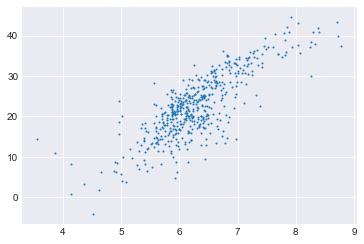

In [30]:
plt.scatter(df['RM'], lm.predict(df), s=1);

### Base d'apprentissage et base de test

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, prix, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354, 1) (152, 1)


In [42]:
train_test_split?

In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

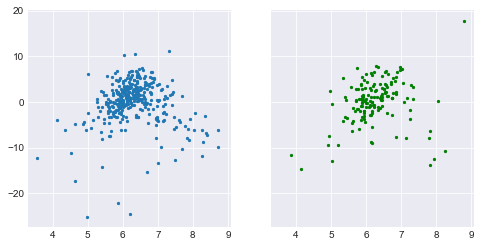

In [47]:
fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
ax1.scatter(X_train['RM'], lm.predict(X_train) - y_train, s=5);
ax2.scatter(X_test['RM'], lm.predict(X_test) - y_test, s=5, c='g');

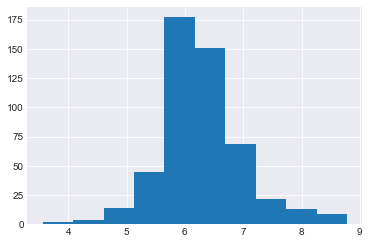

In [48]:
df['RM'].hist();

In [49]:
# stratify
train_test_split?

### 3. Arbres de décision avec scikit-learn

MEDV    22.532806
dtype: float64

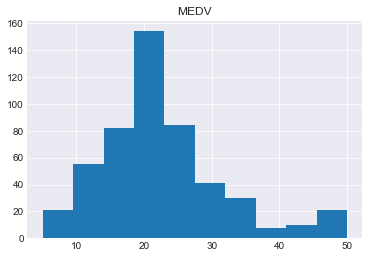

In [19]:
prix.hist();
prix.mean()

In [50]:
z_train = y_train > y_train.mean()
z_test = y_test > y_test.mean()
z_train['MEDV'].value_counts()

False    216
True     138
Name: MEDV, dtype: int64

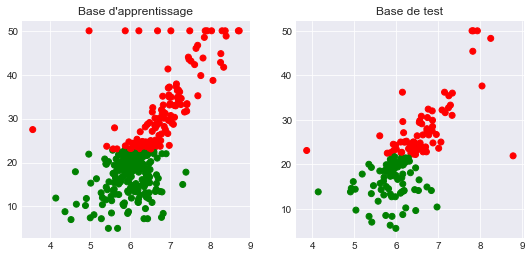

In [51]:
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax1.set_title("Base d'apprentissage")
c_train = np.where(z_train['MEDV'], ['r'] * len(z_train), ['g'] * len(z_train))
ax1.scatter(X_train['RM'], y_train, color=c_train)
ax2 = fig.add_subplot(122)
ax2.set_title("Base de test")
c_test = np.where(z_test['MEDV'], ['r'] * len(z_test), ['g'] * len(z_test))
ax2.scatter(X_test['RM'], y_test, color=c_test);

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Accuracy:  0.83%


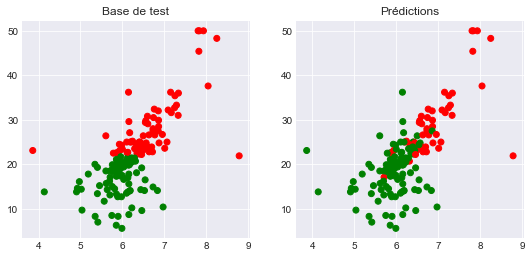

In [54]:
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, z_train)
z_pred = dt.predict(X_test)

acc_test = accuracy_score(z_test, z_pred)
print("Accuracy:  {:.2f}%".format(acc_test))

fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax1.set_title("Base de test")
c_test = np.where(z_test['MEDV'], ['r'] * len(z_test), ['g'] * len(z_test))
ax1.scatter(X_test['RM'], y_test, color=c_test)
ax2 = fig.add_subplot(122)
ax2.set_title("Prédictions")
c_pred = np.where(z_pred, ['r'] * len(z_pred), ['g'] * len(z_pred))
ax2.scatter(X_test['RM'], y_test, color=c_pred);

In [55]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=5)
selector.fit(X_train, z_train)
X_train.columns[selector.get_support()]

Index(['CRIM', 'ZN', 'AGE', 'TAX', 'LSTAT'], dtype='object')

In [25]:
pnd.Series(df.columns)

0        CRIM
1          ZN
2       INDUS
3        CHAS
4         NOX
5          RM
6         AGE
7         DIS
8         RAD
9         TAX
10    PTRATIO
11          B
12      LSTAT
dtype: object

### Avec Graphiz

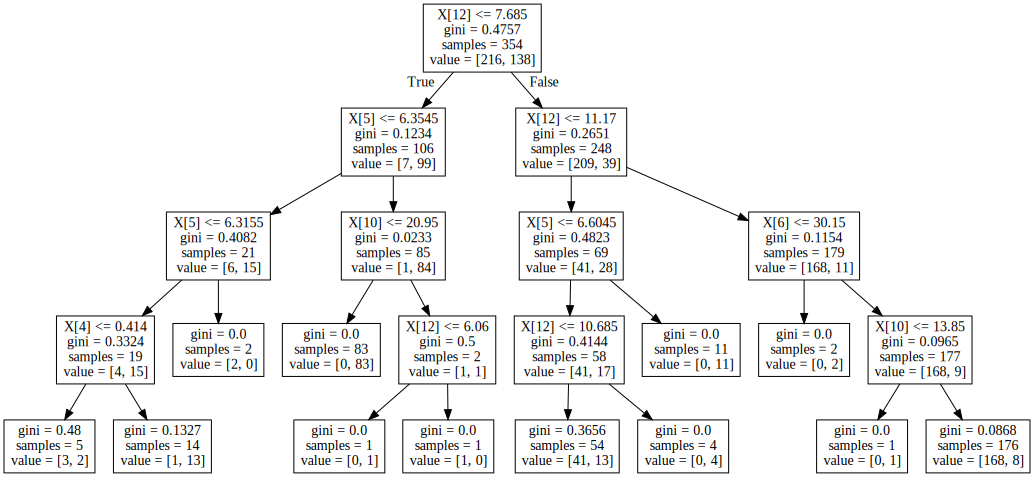

In [58]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dt, out_file=None)
graphviz.Source(dot_data)